In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_delivery = pd.read_csv('../01_CSV Trabajo/df_final.csv')

In [3]:
df_delivery.head()

,grouped_category,total_onshift_partners,total_busy_partners,total_outstanding_orders,order_hour,order_day,delivery_duration
0,American,33.0,14.0,21.0,22,Friday,3779.0
1,Mexican,1.0,2.0,2.0,21,Tuesday,4024.0
2,Indian,8.0,6.0,18.0,0,Monday,1586.0
3,Italian,5.0,6.0,8.0,3,Thursday,2273.0
4,Italian,5.0,5.0,7.0,2,Tuesday,2988.0


In [4]:
df_delivery.columns

Index(['grouped_category', 'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'order_hour', 'order_day',
       'delivery_duration'],
      dtype='object')

In [16]:
df_delivery.value_counts('grouped_category')

grouped_category
Asian            33928
Fast Food        26338
Italian          21334
American         20811
Other            17134
Mexican          15623
Mediterranean     9195
Desserts          7700
Indian            6494
Healthy           4265
Beverages         2082
Latin              823
European           741
Name: count, dtype: int64

In [20]:
# Eliminar la columna 'store_primary_category' ya que no está en el df original
# Realizar una inspección de valores nulos y tipos de datos para las columnas relevantes

df_delivery_clean2 = df_delivery.copy()

# Comprobar los valores nulos y tipos de datos
df_delivery_clean2_info = df_delivery_clean2.info()

# Ver los valores únicos de las columnas relevantes
df_delivery_clean2.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166468 entries, 0 to 166467
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   grouped_category          166468 non-null  object 
 1   total_onshift_partners    166468 non-null  float64
 2   total_busy_partners       166468 non-null  float64
 3   total_outstanding_orders  166468 non-null  float64
 4   order_hour                166468 non-null  int64  
 5   order_day                 166468 non-null  object 
 6   delivery_duration         166468 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 8.9+ MB


,grouped_category,total_onshift_partners,total_busy_partners,total_outstanding_orders,order_hour,order_day,delivery_duration
count,166468,166468.000000,166468.000000,166468.000000,166468.000000,166468,166468.000000
unique,13,NaN,NaN,NaN,NaN,7,NaN
top,Asian,NaN,NaN,NaN,NaN,Saturday,NaN
freq,33928,NaN,NaN,NaN,NaN,29202,NaN
mean,NaN,44.659196,41.621032,57.696254,8.633719,NaN,2776.708310
std,NaN,34.477872,32.115298,52.508727,8.712715,NaN,967.289328
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,101.000000
25%,NaN,17.000000,15.000000,17.000000,2.000000,NaN,2079.000000
50%,NaN,36.000000,34.000000,40.000000,3.000000,NaN,2620.000000
75%,NaN,65.000000,62.000000,84.000000,19.000000,NaN,3309.000000


In [21]:
# Verificar si hay valores NaN en el dataframe después de la limpieza
df_delivery_clean2.isna().sum()


grouped_category            0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
order_hour                  0
order_day                   0
delivery_duration           0
dtype: int64

In [22]:
df_delivery_clean2.head()


,grouped_category,total_onshift_partners,total_busy_partners,total_outstanding_orders,order_hour,order_day,delivery_duration
0,American,33.0,14.0,21.0,22,Friday,3779.0
1,Mexican,1.0,2.0,2.0,21,Tuesday,4024.0
2,Indian,8.0,6.0,18.0,0,Monday,1586.0
3,Italian,5.0,6.0,8.0,3,Thursday,2273.0
4,Italian,5.0,5.0,7.0,2,Tuesday,2988.0


In [24]:
df_delivery_clean2 = df_delivery_clean2.drop(columns=['total_busy_partners', 'total_onshift_partners'])


In [25]:
df_delivery_clean2.value_counts('grouped_category')

grouped_category
Asian            33928
Fast Food        26338
Italian          21334
American         20811
Other            17134
Mexican          15623
Mediterranean     9195
Desserts          7700
Indian            6494
Healthy           4265
Beverages         2082
Latin              823
European           741
Name: count, dtype: int64

In [26]:
# Detectar outliers en 'delivery_duration' usando el rango intercuartil (IQR)
Q1 = df_delivery_clean2['delivery_duration'].quantile(0.25)
Q3 = df_delivery_clean2['delivery_duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los outliers en 'delivery_duration'
df_delivery_clean = df_delivery_clean[(df_delivery_clean2['delivery_duration'] >= lower_bound) & 
                                      (df_delivery_clean2['delivery_duration'] <= upper_bound)]

# Ver el tamaño del dataframe después de eliminar outliers
df_delivery_clean2.shape


/var/folders/41/9xs275yn7jxbs_h59j3pq3sw0000gn/T/ipykernel_73179/2329130466.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_delivery_clean = df_delivery_clean[(df_delivery_clean2['delivery_duration'] >= lower_bound) &


(166468, 5)

In [29]:
df_delivery_clean2.head()


,grouped_category,total_outstanding_orders,order_hour,order_day,delivery_duration
0,American,21.0,22,Friday,3779.0
1,Mexican,2.0,21,Tuesday,4024.0
2,Indian,18.0,0,Monday,1586.0
3,Italian,8.0,3,Thursday,2273.0
4,Italian,7.0,2,Tuesday,2988.0


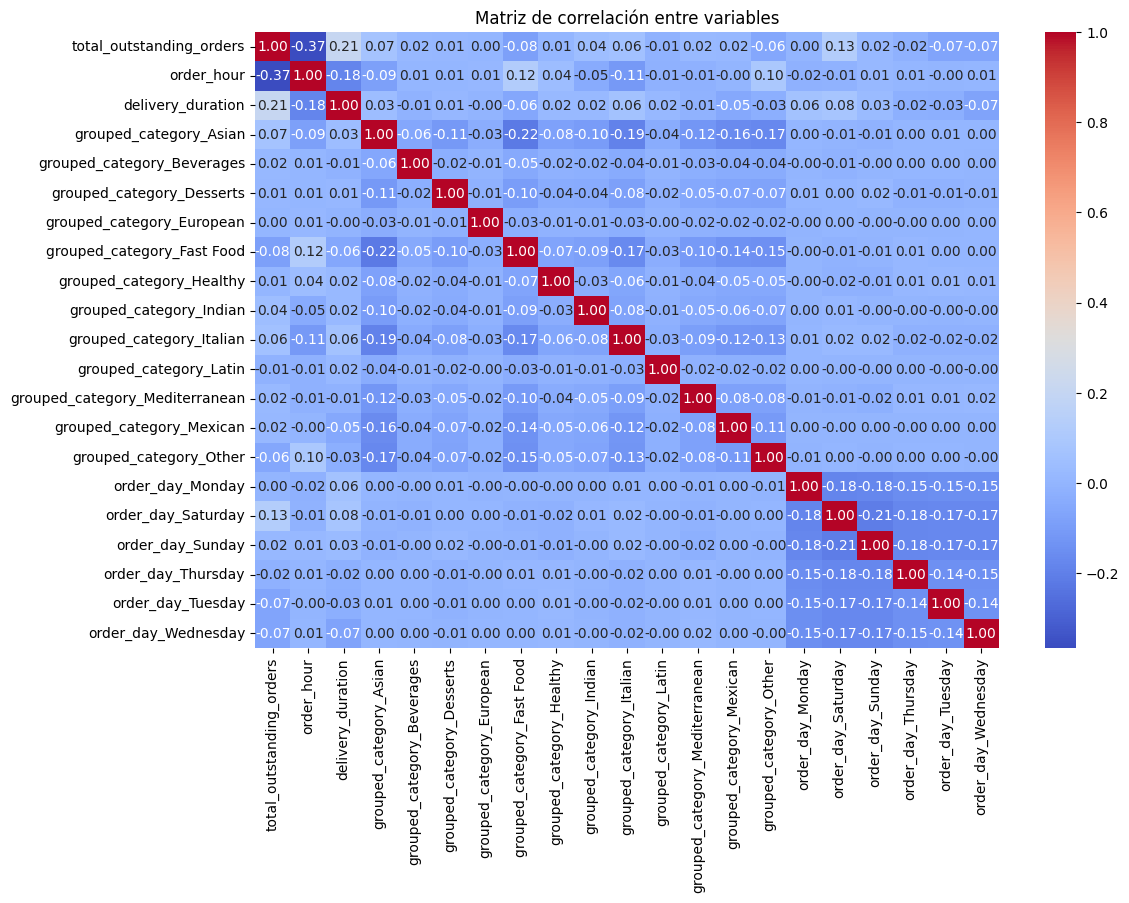

In [30]:
# Seleccionar las columnas relevantes para el análisis
selected_columns = [
    'grouped_category', 
    'total_outstanding_orders', 
    'order_hour', 
    'order_day', 
    'delivery_duration'
]

# Verificar el contenido del dataframe
df_delivery_clean2 = df_delivery_clean2[selected_columns]

# Codificar variables categóricas para la correlación
df_encoded = pd.get_dummies(df_delivery_clean2, columns=['grouped_category', 'order_day'], drop_first=True)

# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Matriz de correlación entre variables")
plt.show()

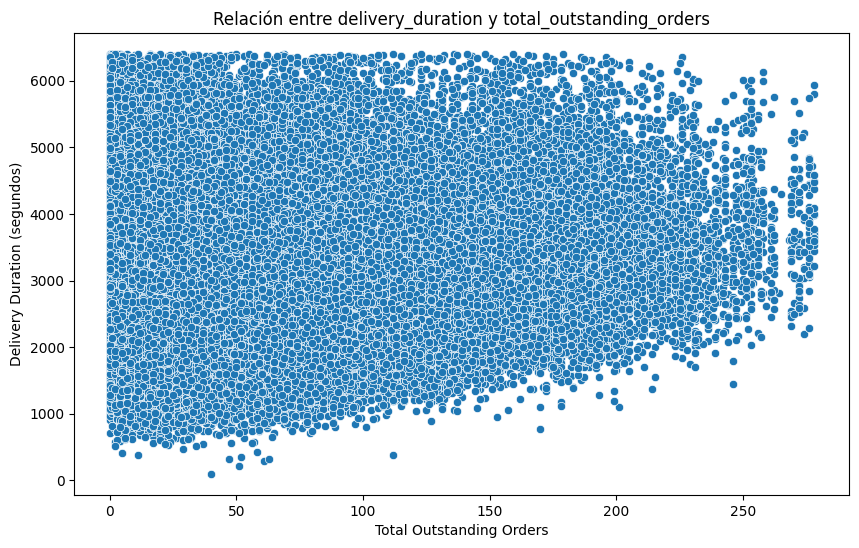

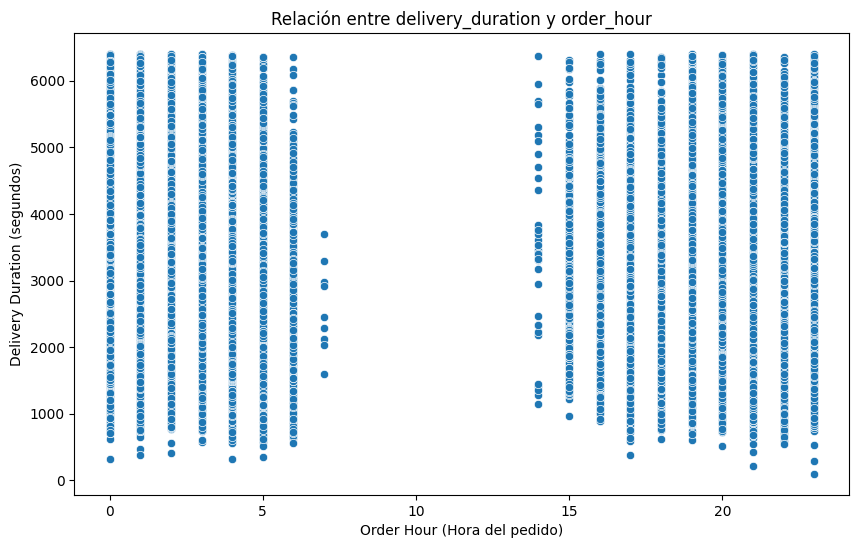

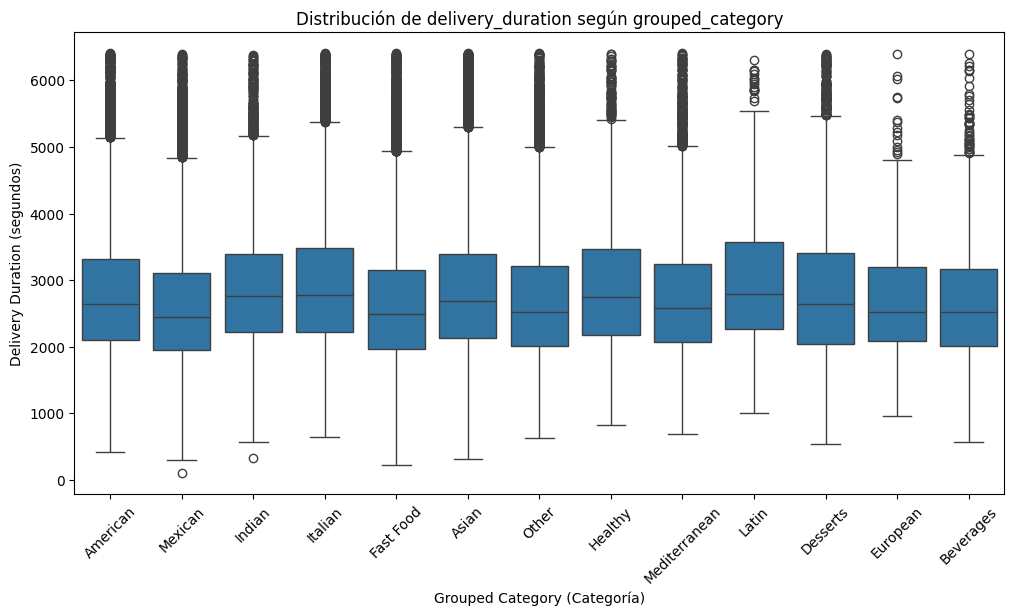

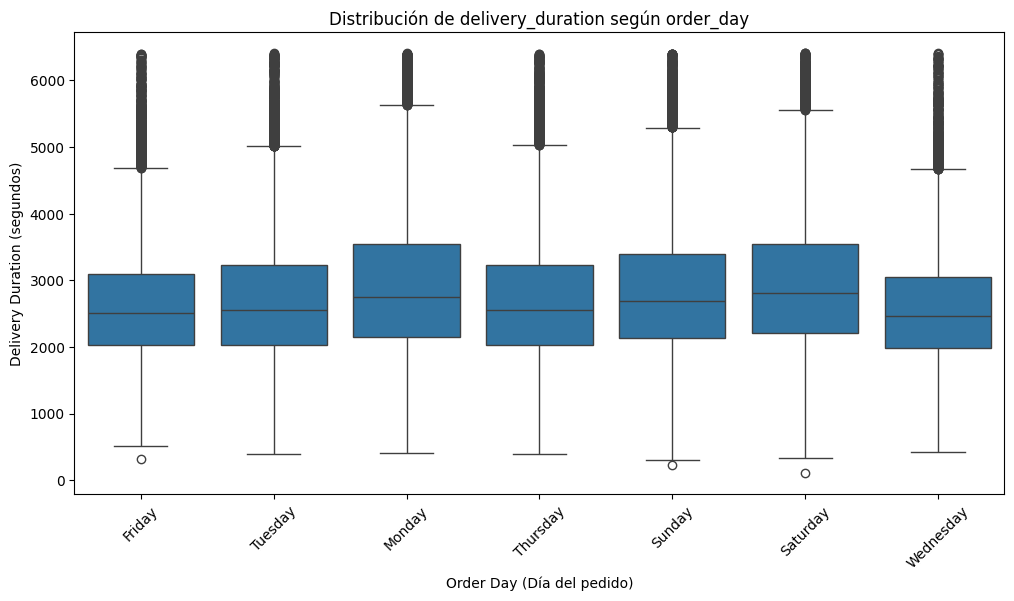

In [31]:
# Gráfico de dispersión: delivery_duration vs total_outstanding_orders
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_delivery_clean2, x='total_outstanding_orders', y='delivery_duration')
plt.title('Relación entre delivery_duration y total_outstanding_orders')
plt.xlabel('Total Outstanding Orders')
plt.ylabel('Delivery Duration (segundos)')
plt.show()

# Gráfico de dispersión: delivery_duration vs order_hour
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_delivery_clean2, x='order_hour', y='delivery_duration')
plt.title('Relación entre delivery_duration y order_hour')
plt.xlabel('Order Hour (Hora del pedido)')
plt.ylabel('Delivery Duration (segundos)')
plt.show()

# Boxplot: delivery_duration según grouped_category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_delivery_clean2, x='grouped_category', y='delivery_duration')
plt.title('Distribución de delivery_duration según grouped_category')
plt.xlabel('Grouped Category (Categoría)')
plt.ylabel('Delivery Duration (segundos)')
plt.xticks(rotation=45)
plt.show()

# Boxplot: delivery_duration según order_day
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_delivery_clean2, x='order_day', y='delivery_duration')
plt.title('Distribución de delivery_duration según order_day')
plt.xlabel('Order Day (Día del pedido)')
plt.ylabel('Delivery Duration (segundos)')
plt.xticks(rotation=45)
plt.show()


In [32]:
# Calcular Q1, Q3 e IQR para delivery_duration
Q1 = df_delivery_clean2['delivery_duration'].quantile(0.25)
Q3 = df_delivery_clean2['delivery_duration'].quantile(0.75)
IQR = Q3 - Q1

# Determinar límites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el dataframe para eliminar outliers
df_no_outliers = df_delivery_clean2[
    (df_delivery_clean2['delivery_duration'] >= lower_bound) &
    (df_delivery_clean2['delivery_duration'] <= upper_bound)
]

# Verificar cuántos datos fueron eliminados
outliers_removed = len(df_delivery_clean2) - len(df_no_outliers)

outliers_removed, df_no_outliers.shape


(4087, (162381, 5))

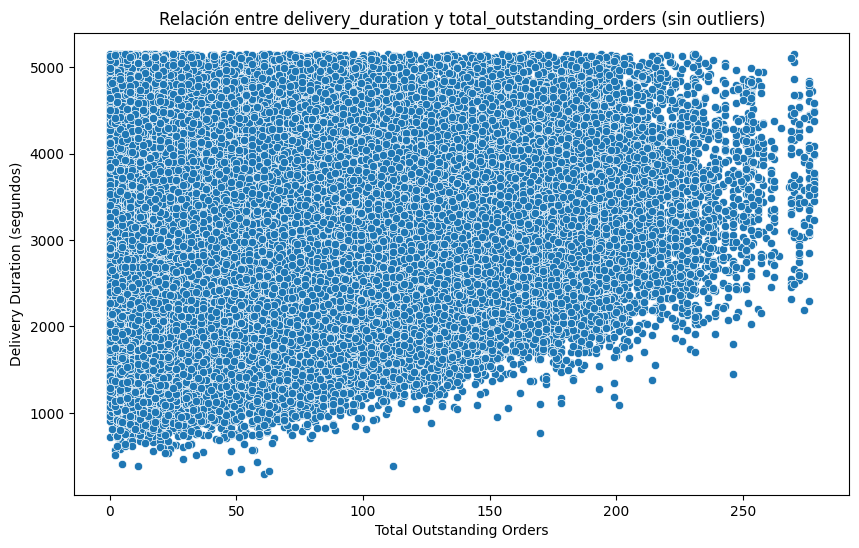

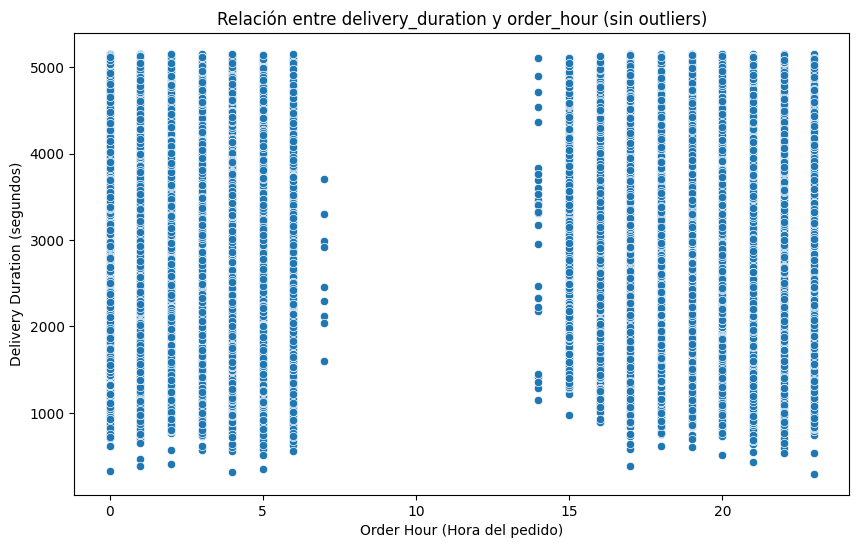

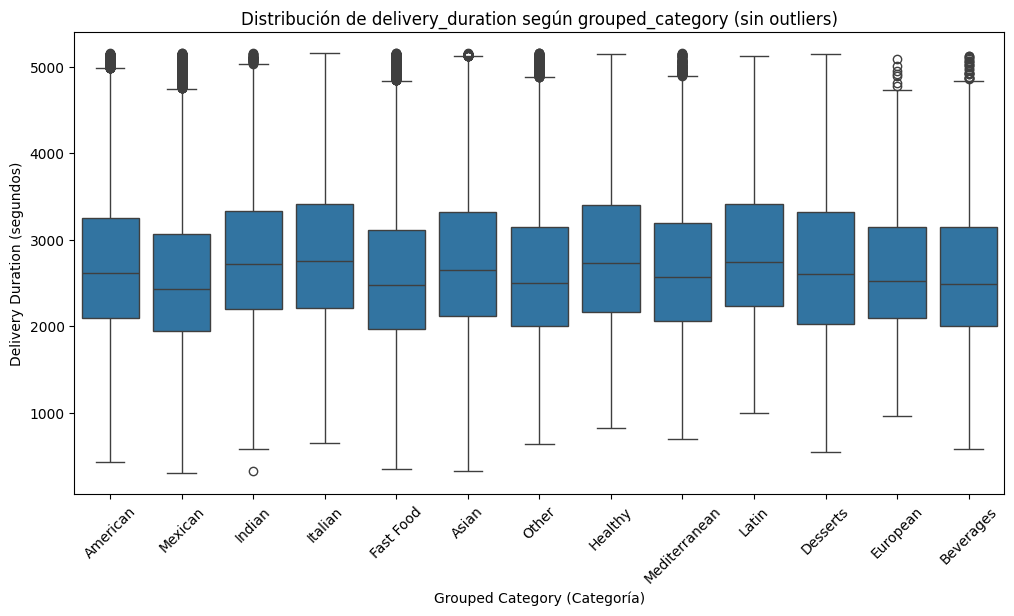

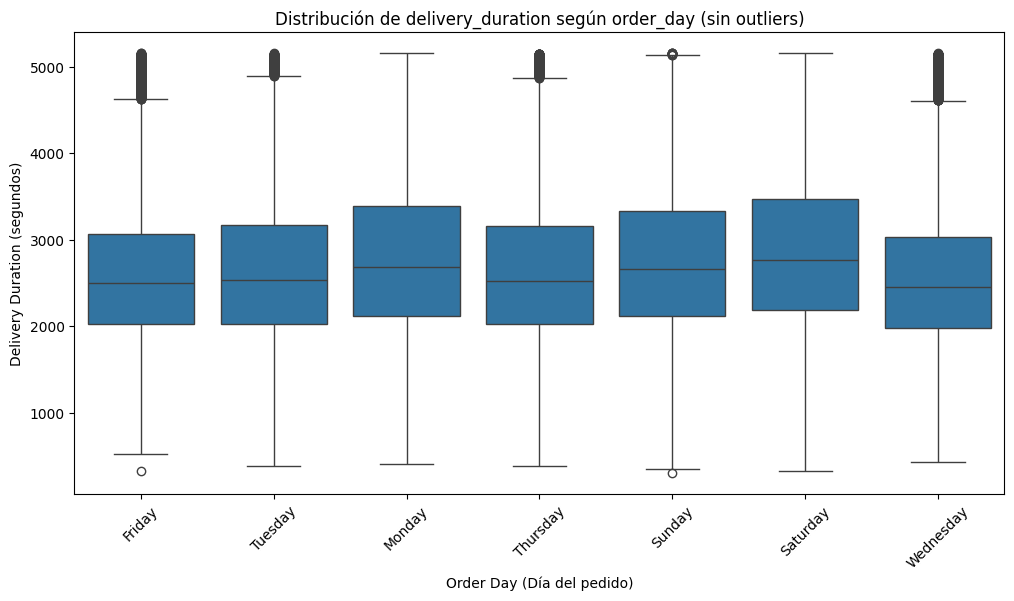

In [33]:
# Gráfico de dispersión: delivery_duration vs total_outstanding_orders (sin outliers)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='total_outstanding_orders', y='delivery_duration')
plt.title('Relación entre delivery_duration y total_outstanding_orders (sin outliers)')
plt.xlabel('Total Outstanding Orders')
plt.ylabel('Delivery Duration (segundos)')
plt.show()

# Gráfico de dispersión: delivery_duration vs order_hour (sin outliers)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_no_outliers, x='order_hour', y='delivery_duration')
plt.title('Relación entre delivery_duration y order_hour (sin outliers)')
plt.xlabel('Order Hour (Hora del pedido)')
plt.ylabel('Delivery Duration (segundos)')
plt.show()

# Boxplot: delivery_duration según grouped_category (sin outliers)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='grouped_category', y='delivery_duration')
plt.title('Distribución de delivery_duration según grouped_category (sin outliers)')
plt.xlabel('Grouped Category (Categoría)')
plt.ylabel('Delivery Duration (segundos)')
plt.xticks(rotation=45)
plt.show()

# Boxplot: delivery_duration según order_day (sin outliers)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers, x='order_day', y='delivery_duration')
plt.title('Distribución de delivery_duration según order_day (sin outliers)')
plt.xlabel('Order Day (Día del pedido)')
plt.ylabel('Delivery Duration (segundos)')
plt.xticks(rotation=45)
plt.show()


In [34]:
# Función para eliminar valores extremos dentro de cada grupo
def remove_outliers_by_group(df, column_group, column_target):
    clean_df = pd.DataFrame()
    for group in df[column_group].unique():
        group_data = df[df[column_group] == group]
        Q1 = group_data[column_target].quantile(0.25)
        Q3 = group_data[column_target].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        group_cleaned = group_data[
            (group_data[column_target] >= lower_bound) & 
            (group_data[column_target] <= upper_bound)
        ]
        clean_df = pd.concat([clean_df, group_cleaned], axis=0)
    return clean_df

# Eliminar valores extremos por order_day
df_no_outliers_day = remove_outliers_by_group(df_no_outliers, 'order_day', 'delivery_duration')

# Eliminar valores extremos por grouped_category
df_no_outliers_category = remove_outliers_by_group(df_no_outliers_day, 'grouped_category', 'delivery_duration')

# Verificar tamaño final del dataframe
df_no_outliers_category.shape


(160417, 5)

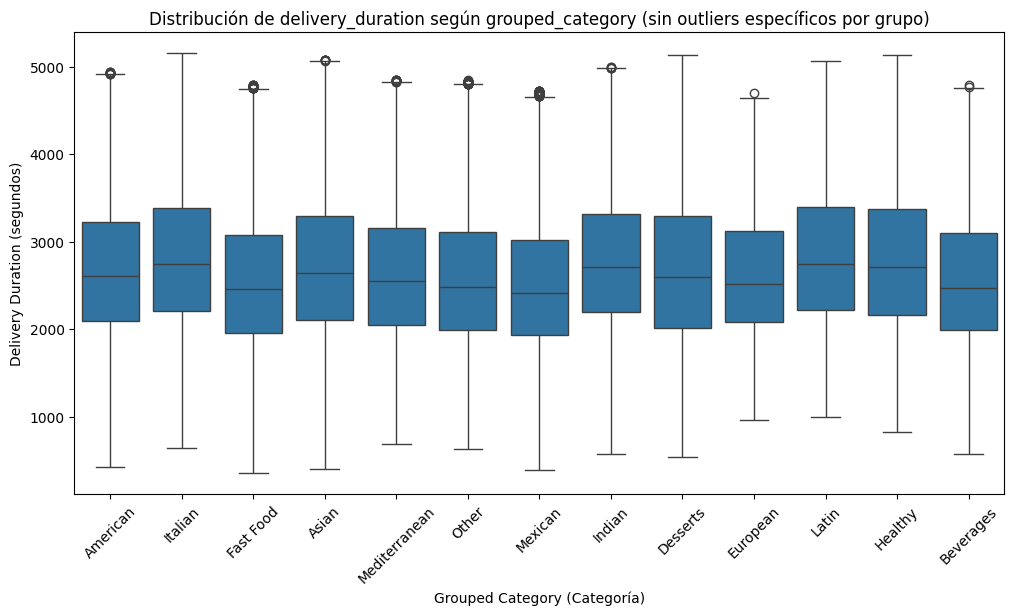

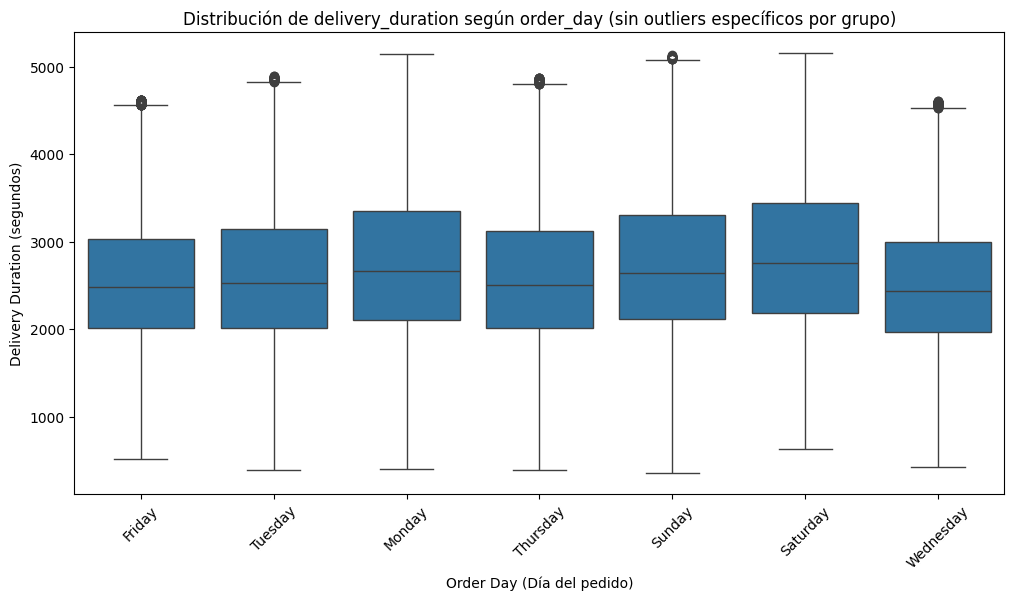

In [35]:
# Boxplot: delivery_duration según grouped_category (sin outliers específicos por grupo)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers_category, x='grouped_category', y='delivery_duration')
plt.title('Distribución de delivery_duration según grouped_category (sin outliers específicos por grupo)')
plt.xlabel('Grouped Category (Categoría)')
plt.ylabel('Delivery Duration (segundos)')
plt.xticks(rotation=45)
plt.show()

# Boxplot: delivery_duration según order_day (sin outliers específicos por grupo)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_outliers_category, x='order_day', y='delivery_duration')
plt.title('Distribución de delivery_duration según order_day (sin outliers específicos por grupo)')
plt.xlabel('Order Day (Día del pedido)')
plt.ylabel('Delivery Duration (segundos)')
plt.xticks(rotation=45)
plt.show()


In [36]:
# Eliminar valores extremos usando percentiles (5% - 95%)
lower_percentile = 0.05
upper_percentile = 0.95

# Calcular los límites de percentiles para delivery_duration
lower_bound = df_no_outliers_category['delivery_duration'].quantile(lower_percentile)
upper_bound = df_no_outliers_category['delivery_duration'].quantile(upper_percentile)

# Filtrar el dataframe para mantener solo los valores dentro del rango
df_trimmed = df_no_outliers_category[
    (df_no_outliers_category['delivery_duration'] >= lower_bound) &
    (df_no_outliers_category['delivery_duration'] <= upper_bound)
]

# Verificar el tamaño del dataframe resultante
df_trimmed.shape


(144376, 5)

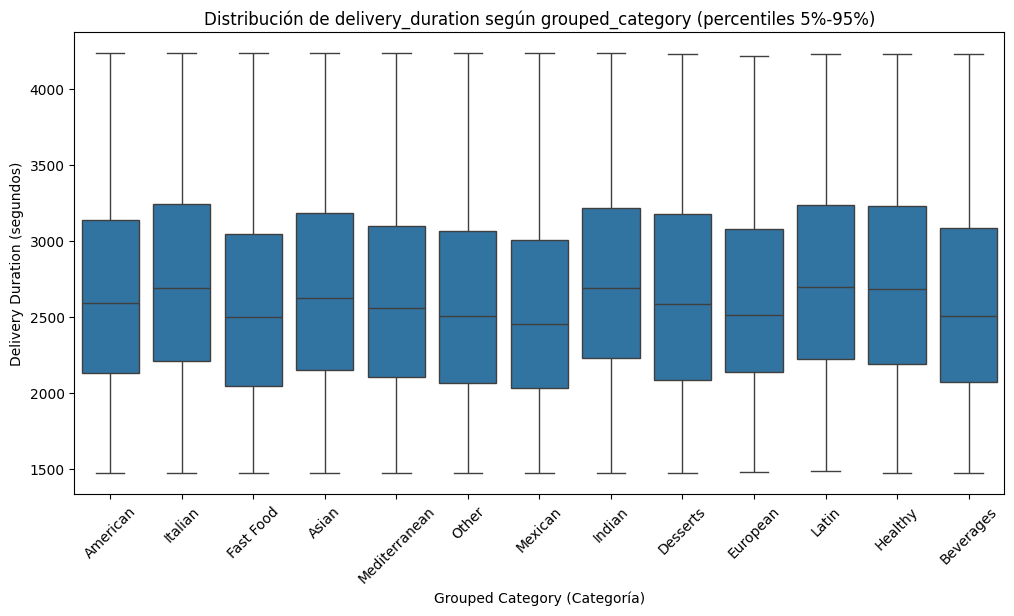

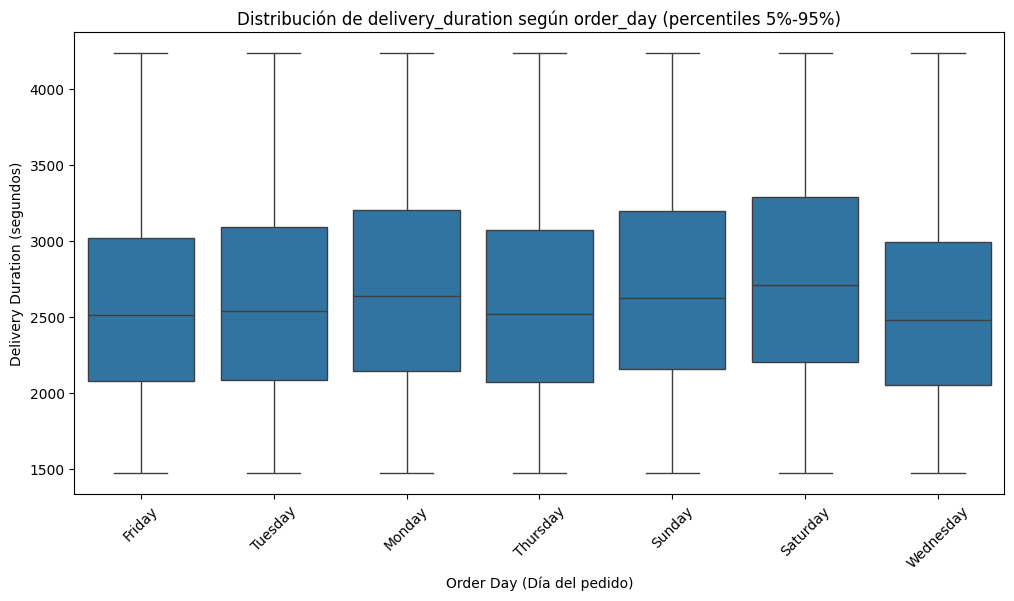

In [37]:
# Boxplot: delivery_duration según grouped_category (percentiles 5%-95%)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_trimmed, x='grouped_category', y='delivery_duration')
plt.title('Distribución de delivery_duration según grouped_category (percentiles 5%-95%)')
plt.xlabel('Grouped Category (Categoría)')
plt.ylabel('Delivery Duration (segundos)')
plt.xticks(rotation=45)
plt.show()

# Boxplot: delivery_duration según order_day (percentiles 5%-95%)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_trimmed, x='order_day', y='delivery_duration')
plt.title('Distribución de delivery_duration según order_day (percentiles 5%-95%)')
plt.xlabel('Order Day (Día del pedido)')
plt.ylabel('Delivery Duration (segundos)')
plt.xticks(rotation=45)
plt.show()


In [38]:
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
import numpy as np

# Análisis de correlación para variables numéricas
correlation_matrix = df_trimmed[['delivery_duration', 'total_outstanding_orders', 'order_hour']].corr()

# ANOVA para variables categóricas
anova_category = f_oneway(
    *[df_trimmed[df_trimmed['grouped_category'] == cat]['delivery_duration'] for cat in df_trimmed['grouped_category'].unique()]
)

anova_day = f_oneway(
    *[df_trimmed[df_trimmed['order_day'] == day]['delivery_duration'] for day in df_trimmed['order_day'].unique()]
)

# Regresión lineal para variables numéricas
X = df_trimmed[['total_outstanding_orders', 'order_hour']].values
y = df_trimmed['delivery_duration'].values

reg_model = LinearRegression()
reg_model.fit(X, y)

regression_coefficients = reg_model.coef_
regression_intercept = reg_model.intercept_

# Resultados
{
    "correlation_matrix": correlation_matrix,
    "anova_category_pvalue": anova_category.pvalue,
    "anova_day_pvalue": anova_day.pvalue,
    "regression_coefficients": regression_coefficients,
    "regression_intercept": regression_intercept
}


{'correlation_matrix':                           delivery_duration  total_outstanding_orders  \
 delivery_duration                  1.000000                  0.214932   
 total_outstanding_orders           0.214932                  1.000000   
 order_hour                        -0.159518                 -0.366769   
 
                           order_hour  
 delivery_duration          -0.159518  
 total_outstanding_orders   -0.366769  
 order_hour                  1.000000  ,
 'anova_category_pvalue': np.float64(1.1682983875573773e-265),
 'anova_day_pvalue': np.float64(0.0),
 'regression_coefficients': array([ 2.36723321, -7.23122162]),
 'regression_intercept': np.float64(2578.7148878952494)}

**1. Análisis de correlación**
total_outstanding_orders tiene una correlación positiva con delivery_duration (0.21), lo que indica que un mayor número de pedidos pendientes tiende a aumentar el tiempo de entrega.
order_hour tiene una correlación negativa con delivery_duration (-0.16), lo que sugiere que los tiempos de entrega son más cortos en ciertas horas del día.
**2. ANOVA (Análisis de varianza)**
grouped_category: El p-valor es 1.17e-265, indicando que las categorías de restaurantes tienen un efecto estadísticamente significativo sobre el tiempo de entrega.
order_day: El p-valor es 0.0, lo que significa que el día de la semana también tiene un impacto significativo en el tiempo de entrega.
**3. Regresión lineal**
Ecuación del modelo: \text{delivery_duration} = 2578.75 + (2.37 \times \text{total_outstanding_orders}) - (7.23 \times \text{order_hour})
Esto significa que:
Por cada pedido pendiente adicional, el tiempo de entrega aumenta en promedio 2.37 segundos.
Por cada hora más tarde que se realice el pedido, el tiempo de entrega disminuye en promedio 7.23 segundos.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separar variables predictoras (X) y objetivo (y)
X = df_trimmed[['grouped_category', 'order_day', 'total_outstanding_orders', 'order_hour']]
y = df_trimmed['delivery_duration']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline para preprocesamiento y modelo
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['grouped_category', 'order_day']),
        ('num', StandardScaler(), ['total_outstanding_orders', 'order_hour'])
    ]
)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
rmse = mean_squared_error(y_test, y_pred) ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse, mae, r2


(710.7660546502814, 573.4800429374874, -0.09797241790901068)

In [41]:
# Crear nuevas características y transformar las existentes
df_transformed = df_trimmed.copy()

# Agrupar horas en periodos del día
def map_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df_transformed['time_of_day'] = df_transformed['order_hour'].apply(map_time_of_day)

# Crear indicador de día laboral o fin de semana
weekend_days = ['Saturday', 'Sunday']
df_transformed['is_weekend'] = df_transformed['order_day'].apply(lambda x: 1 if x in weekend_days else 0)

# Transformación logarítmica en total_outstanding_orders (evitar problemas con 0)
df_transformed['log_outstanding_orders'] = df_transformed['total_outstanding_orders'].apply(lambda x: np.log1p(x))

# Interacción entre categoría y día del pedido
df_transformed['category_day_interaction'] = df_transformed['grouped_category'] + '_' + df_transformed['order_day']

# Selección de las características relevantes para el modelo
X = df_transformed[['grouped_category', 'order_day', 'time_of_day', 'is_weekend', 
                     'log_outstanding_orders', 'order_hour', 'category_day_interaction']]
y = df_transformed['delivery_duration']

# Codificación de variables categóricas y normalización
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['grouped_category', 'order_day', 'time_of_day', 'category_day_interaction']),
        ('num', StandardScaler(), ['log_outstanding_orders', 'order_hour'])
    ]
)

# Modelo Random Forest con transformaciones
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10))
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse, mae, r2


(636.3938516124019, 523.6146545452206, 0.11978244836192431)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para la búsqueda en grid
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [5, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Crear el modelo con pipeline
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y resultados
best_params = grid_search.best_params_
best_rmse = (-grid_search.best_score_) ** 0.5

best_params, best_rmse


Fitting 3 folds for each of 81 candidates, totalling 243 fits
